<a href="https://colab.research.google.com/github/ZiyueNie/19ma573ZiyueNie/blob/master/src/hw11_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from array import array


In [0]:
rho=1
alpha=1
dx=0.2
dt=rho*(dx**2)/alpha
a=0
b=1

In [0]:
def f(x):
  return np.sin(np.pi*x)

In [0]:
def exact_solution(x,t):
  return np.exp((-np.pi**2)*t)*np.sin(np.pi*x)

In [0]:
def error(M,dx,dt,u):
  N = int((b-a)/dx)
  E = np.zeros((M+1,N+1))
  for t in range(M+1):
    for x in range(N+1):
      E[t][x] = np.abs(u[t][x]-exact_solution(a+x*dx,t*dt))
  sup=np.max(E)
  return E,sup

In [0]:
def ftcs(M,rho,dx,dt):
  N = int((b-a)/dx)
  U = np.zeros((M+1,N+1))
  for x in range(1,N): # here is (1,N) since u(a,t)=0 u(b,t)=0
    U[0][x] = f(a+x*dx)
  for t in range(0,M):
    for x in range(1,N):
      U[t+1][x]=rho*(U[t][x+1])+(1-2*rho)*(U[t][x])+rho*(U[t][x-1])
  return U

In [0]:
u1=ftcs(100,1,0.2,dt) #M=100
#print(u1)


In [99]:
e1,s1=error(100,0.2,dt,u1) #M=100
#print(e)
print("Using ftcs, the supnorm of error function is "+str(s1))

Using ftcs, the supnorm of error function is 1.5574828815118633e+25


In [75]:
'''
a=np.zeros(4)
for i in range(0,4):
  a[i]=2
print(a)
A=np.diag(a,-1)
print(A)
'''

[2. 2. 2. 2.]
[[0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 2. 0.]]


In [0]:
def btcs(M,rho,dx, dt):
  N = int((b-a)/dx)
  U = np.zeros((M+1,N+1))
  array1=np.zeros(N)
  array2=np.zeros(N+1)
  for i in range(0,N):
    array1[i]=-rho
    array2[i]=2*rho+1
  
  A = np.diag(array1,-1) + np.diag(array2,0) + np.diag(array1,1)
  
  for x in range(0,N+1):
    U[0][x] = f(a+x*dx)
  
  for t in range(0,M):
    U[t+1][:] = np.linalg.inv(A).dot(U[t][:])
  
  return U

In [0]:
u2 = btcs(100,rho,dx,dt)


In [103]:
e2,s2=error(100,dx,dt,u2) #M=100
#print(e)
print("Using btcs, the supnorm of error function is "+str(s2))

Using btcs, the supnorm of error function is 1.577710673143973e+47


[0.  0.2 0.4 0.6 0.8 1. ]


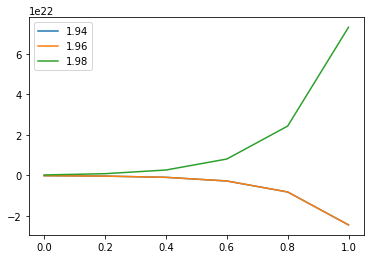

In [117]:
xx = np.arange(0,1.2,.2)
print(xx)
error1 = np.zeros(6)
error2 = np.zeros(6)
error3 = np.zeros(6)
for i in range(len(error1)):
    error1[i] = exact_solution(xx[i],1.94)-u2[int(1.94/dt)][i]
    error2[i] = exact_solution(xx[i],1.96)-u2[int(1.96/dt)][i]
    error3[i] = exact_solution(xx[i],1.98)-u2[int(1.98/dt)][i]

plt.plot(xx,error1)
plt.plot(xx,error2)
plt.plot(xx,error3)
plt.legend(["1.94", "1.96", "1.98"])